In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_train.csv')
print(train.shape)

(10000, 17)


In [ ]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
X_train.head(10)

,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional
0,1,8,2,9,0,0,0,0,0,4,115,159,1,0,0,0
1,1,13,1,3,0,0,38,1,0,117,102,124,0,1,0,0
2,1,12,6,2,0,0,0,0,0,18,92,227,1,0,0,0
3,0,12,3,3,0,0,0,0,0,0,76,188,0,0,0,0
4,1,9,3,3,0,0,0,0,0,3,11,212,0,0,0,0
5,0,12,3,3,0,0,0,0,0,0,1,5,0,0,0,0
6,1,9,4,3,0,0,0,0,0,0,88,160,0,0,0,0
7,1,10,2,3,0,0,0,0,0,8,24,16,0,0,0,0
8,1,6,0,3,0,0,0,0,0,5,82,82,0,0,0,0
9,1,9,0,3,0,0,0,0,0,44,402,326,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

X_train =  (8000, 16)
X_valid =  (2000, 16)
y_train =  (8000,)
y_valid =  (2000,)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

(8000, 2) (2000, 2)


#0. MinMaxScaler써야함 - 비교 통해 보기

***MinMaxScaler 안썼을 때***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_54 (Batc (None, 256)               1024      
_________________________________________________________________
activation_86 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_55 (Batc (None, 128)               512       
_________________________________________________________________
activation_87 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=100, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)   # 과적합된 것을 볼 수 있음

Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 0.4319 - accuracy: 0.8303 - val_loss: 0.9114 - val_accuracy: 0.4820
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8765 - val_loss: 1.0556 - val_accuracy: 0.4820
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8758 - val_loss: 1.1142 - val_accuracy: 0.4820
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.2660 - accuracy: 0.8945 - val_loss: 1.2481 - val_accuracy: 0.4820
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.8913 - val_loss: 1.4089 - val_accuracy: 0.4820
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.8903 - val_loss: 1.4694 - val_accuracy: 0.4820
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2367 - accuracy: 0.9043 - val_loss: 1.4850 - val_accuracy: 0.4815

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.156592
accuracy        0.936146
val_loss        1.845762
val_accuracy    0.481980
dtype: float64

***StandardScaler 썼을 때***

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
print(train.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
train.head()

(10104, 17)


,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,0.524513,0.072786,-0.799763,4.371390,-0.179481,-0.266402,2.623897,2.267653,-0.540131,0.033263,-0.030873,-0.562182,1.758978,-0.292389,-0.155055,2.863946,-1.0
1,0.524513,0.072786,-0.799763,-0.065188,-0.179481,-0.266402,1.921454,2.267653,-0.540131,5.151783,0.064087,-0.308656,1.758978,1.839140,-0.155055,2.863946,-1.0
2,0.524513,-0.172249,0.752447,2.835652,2.577965,-0.266402,2.245658,2.267653,-0.540131,9.172177,0.003460,-0.456546,1.758978,-0.292389,2.193785,-0.349169,-1.0
3,0.524513,-0.008892,0.235044,-0.406463,-0.179481,-0.266402,0.948840,2.267653,-0.540131,0.401327,-0.030478,0.151137,1.758978,3.970669,-0.155055,-0.349169,-1.0
4,-1.906532,0.154465,0.235044,1.129275,1.658816,3.640317,-0.537098,-0.440985,-0.540131,-0.215484,-0.031172,-0.598877,-0.568512,-0.292389,-0.155055,-0.349169,-1.0


In [ ]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_58 (Batc (None, 256)               1024      
_________________________________________________________________
activation_92 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_59 (Batc (None, 128)               512       
_________________________________________________________________
activation_93 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=100, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)    #정확도가 100%? =>문제가 있는 것같음.

Epoch 1/100
127/127 [==============================] - 2s 5ms/step - loss: 0.1796 - accuracy: 0.9783 - val_loss: 0.0913 - val_accuracy: 1.0000
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 3/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 4/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/100
127/127 [==============================] - 0s 4ms/step - loss: 9.4599e-04 - accuracy: 1.0000 - val_loss: 7.4779e-04 - val_accuracy: 1.0000
Epoch 6/100
127/127 [==============================] - 0s 3ms/step - loss: 6.2140e-04 - accuracy: 1.0000 - val_loss: 4.9131e-04 - val_accuracy: 1.0000
Epoch 7/100
127/127 [==============================] - 0s 3ms/step - loss: 4.3720e-04 - accuracy: 1.0000 - val_loss: 3.4727e-0

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.002003
accuracy        0.999783
val_loss        0.001095
val_accuracy    1.000000
dtype: float64

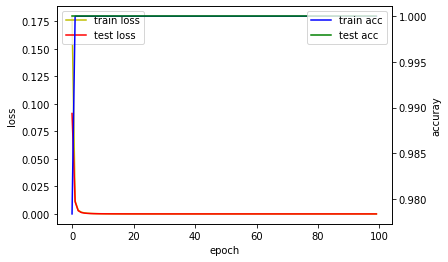

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

***MinMaxScaler 썼을 때***

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
print(train.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
train.head()

(10104, 17)


,#profile_pic,#id_len,#num_in_id,#name_len,#num_in_name,#name==id,#itro_len,#url,#private,#post,#follower_counts,#follows_counts,#highlight,#account_tag,#hash_tag,#professional,#fake
0,1.0,0.008333,0.0000,0.688889,0.000000,0.0,0.544186,1.0,0.0,0.006048,4.370258e-06,0.010508,1.0,0.000000,0.000000,1.0,0.0
1,1.0,0.008333,0.0000,0.111111,0.000000,0.0,0.423256,1.0,0.0,0.130495,1.335357e-03,0.066881,1.0,0.090909,0.000000,1.0,0.0
2,1.0,0.005833,0.1875,0.488889,0.042857,0.0,0.479070,1.0,0.0,0.228243,4.855842e-04,0.033997,1.0,0.000000,0.107143,0.0,0.0
3,1.0,0.007500,0.1250,0.066667,0.000000,0.0,0.255814,1.0,0.0,0.014997,9.908953e-06,0.169119,1.0,0.181818,0.000000,0.0,0.0
4,0.0,0.009167,0.1250,0.266667,0.028571,0.2,0.000000,0.0,0.0,0.000000,1.820941e-07,0.002349,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_62 (Batc (None, 256)               1024      
_________________________________________________________________
activation_98 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_63 (Batc (None, 128)               512       
_________________________________________________________________
activation_99 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=100, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)  #적당한 것같음.

Epoch 1/100
127/127 [==============================] - 2s 5ms/step - loss: 0.3606 - accuracy: 0.8580 - val_loss: 0.5512 - val_accuracy: 0.6878
Epoch 2/100
127/127 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8790 - val_loss: 0.3789 - val_accuracy: 0.8491
Epoch 3/100
127/127 [==============================] - 0s 4ms/step - loss: 0.2640 - accuracy: 0.8880 - val_loss: 0.2756 - val_accuracy: 0.8892
Epoch 4/100
127/127 [==============================] - 0s 4ms/step - loss: 0.2445 - accuracy: 0.8963 - val_loss: 0.2385 - val_accuracy: 0.9050
Epoch 5/100
127/127 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9029 - val_loss: 0.2237 - val_accuracy: 0.9085
Epoch 6/100
127/127 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9066 - val_loss: 0.2216 - val_accuracy: 0.9114
Epoch 7/100
127/127 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9118 - val_loss: 0.2219 - val_accuracy: 0.9134

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.081843
accuracy        0.967659
val_loss        0.362573
val_accuracy    0.917031
dtype: float64

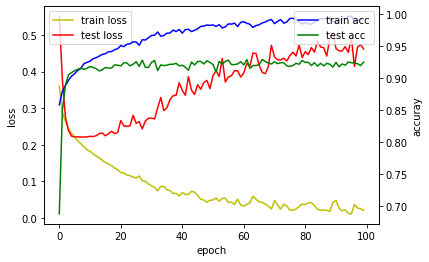

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

#1. Softmax / Adam / BatchNormalization 쓸 때 적절한 hidden층 찾기

*히든 층 4개 줄 때*

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 256)               4352      
_________________________________________________________________
batch_normalization_66 (Batc (None, 256)               1024      
_________________________________________________________________
activation_104 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_67 (Batc (None, 128)               512       
_________________________________________________________________
activation_105 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 4ms/step - loss: 0.3706 - accuracy: 0.8565 - val_loss: 0.4899 - val_accuracy: 0.8694
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8804 - val_loss: 0.4166 - val_accuracy: 0.8337
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.8875 - val_loss: 0.3086 - val_accuracy: 0.8748
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.8966 - val_loss: 0.2441 - val_accuracy: 0.9010
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9060 - val_loss: 0.2215 - val_accuracy: 0.9179
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9113 - val_loss: 0.2205 - val_accuracy: 0.9169
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9139 - val_loss: 0.2205 - val_accuracy: 0.9174

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.048467
accuracy        0.981305
val_loss        0.436682
val_accuracy    0.918248
dtype: float64

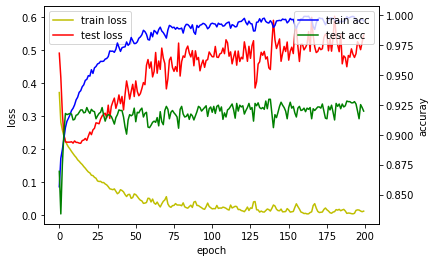

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

*히든 층 5개 줄 때*

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 256)               4352      
_________________________________________________________________
batch_normalization_69 (Batc (None, 256)               1024      
_________________________________________________________________
activation_109 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_70 (Batc (None, 128)               512       
_________________________________________________________________
activation_110 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 5ms/step - loss: 0.3563 - accuracy: 0.8591 - val_loss: 0.5450 - val_accuracy: 0.7744
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.8781 - val_loss: 0.3853 - val_accuracy: 0.8669
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.8858 - val_loss: 0.2950 - val_accuracy: 0.8758
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.8939 - val_loss: 0.2453 - val_accuracy: 0.9010
Epoch 5/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.8992 - val_loss: 0.2301 - val_accuracy: 0.9104
Epoch 6/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9068 - val_loss: 0.2288 - val_accuracy: 0.9189
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9119 - val_loss: 0.2200 - val_accuracy: 0.9144

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.048906
accuracy        0.980887
val_loss        0.413402
val_accuracy    0.920866
dtype: float64

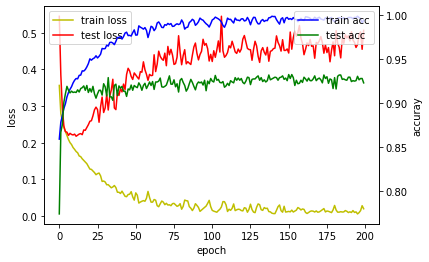

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

*히든 층 6개 줄 때*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #hidden layer #6
  model.add(Dense(units = (8)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 256)               4352      
_________________________________________________________________
batch_normalization_73 (Batc (None, 256)               1024      
_________________________________________________________________
activation_115 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_74 (Batc (None, 128)               512       
_________________________________________________________________
activation_116 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 5ms/step - loss: 0.5005 - accuracy: 0.8321 - val_loss: 0.6249 - val_accuracy: 0.6863
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.8712 - val_loss: 0.4196 - val_accuracy: 0.8501
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.8806 - val_loss: 0.2897 - val_accuracy: 0.8773
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.8888 - val_loss: 0.2711 - val_accuracy: 0.8877
Epoch 5/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.8942 - val_loss: 0.2547 - val_accuracy: 0.8966
Epoch 6/200
127/127 [==============================] - 0s 4ms/step - loss: 0.2315 - accuracy: 0.8993 - val_loss: 0.2445 - val_accuracy: 0.9030
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2234 - accuracy: 0.9031 - val_loss: 0.2308 - val_accuracy: 0.9095

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.053105
accuracy        0.979511
val_loss        0.429705
val_accuracy    0.918261
dtype: float64

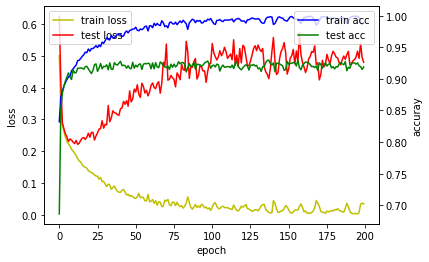

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**결론 : 층이 5개일 때가 가장 나은 것같다.**

# Adam 학습률 0.001, 0.01, 0.05 중 어떤 것이 나을까?

***Adam's lr == 0.01***

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
activation_25 (Activation)   (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 7ms/step - loss: 0.3506 - accuracy: 0.8508 - val_loss: 0.3038 - val_accuracy: 0.8753
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3066 - accuracy: 0.8721 - val_loss: 0.2935 - val_accuracy: 0.8733
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2953 - accuracy: 0.8744 - val_loss: 0.2618 - val_accuracy: 0.8847
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2825 - accuracy: 0.8809 - val_loss: 0.2661 - val_accuracy: 0.8857
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2703 - accuracy: 0.8841 - val_loss: 0.2481 - val_accuracy: 0.8996
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2569 - accuracy: 0.8908 - val_loss: 0.2205 - val_accuracy: 0.9129
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2511 - accuracy: 0.8936 - val_loss: 0.2353 - val_accuracy: 0.9080

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.136163
accuracy        0.944006
val_loss        0.228515
val_accuracy    0.924109
dtype: float64

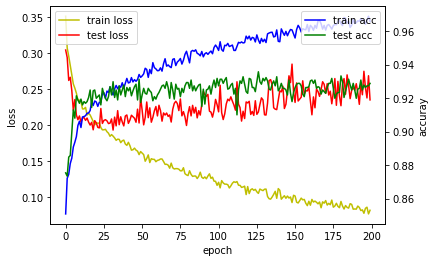

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

***Adam's lr == 0.005***

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
activation_30 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
_________________________________________________________________
activation_31 (Activation)   (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 7ms/step - loss: 0.3635 - accuracy: 0.8472 - val_loss: 0.3680 - val_accuracy: 0.8649
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3018 - accuracy: 0.8711 - val_loss: 0.3147 - val_accuracy: 0.8743
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2894 - accuracy: 0.8797 - val_loss: 0.2556 - val_accuracy: 0.8867
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2747 - accuracy: 0.8830 - val_loss: 0.2310 - val_accuracy: 0.9070
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2637 - accuracy: 0.8908 - val_loss: 0.2216 - val_accuracy: 0.9144
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2486 - accuracy: 0.8957 - val_loss: 0.2164 - val_accuracy: 0.9169
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2447 - accuracy: 0.8984 - val_loss: 0.2127 - val_accuracy: 0.9179

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.128642
accuracy        0.947630
val_loss        0.242052
val_accuracy    0.923911
dtype: float64

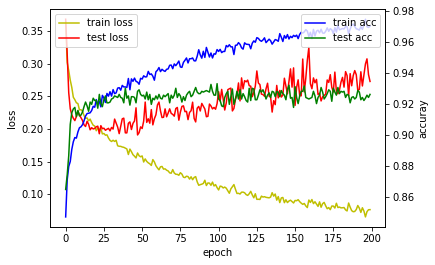

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

***Adam's lr == 0.001***

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512       
_________________________________________________________________
activation_37 (Activation)   (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.4115 - accuracy: 0.8246 - val_loss: 0.4892 - val_accuracy: 0.8644
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3242 - accuracy: 0.8669 - val_loss: 0.3856 - val_accuracy: 0.8753
Epoch 3/200
127/127 [==============================] - 1s 4ms/step - loss: 0.3067 - accuracy: 0.8699 - val_loss: 0.3122 - val_accuracy: 0.8778
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2979 - accuracy: 0.8736 - val_loss: 0.2756 - val_accuracy: 0.8916
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2900 - accuracy: 0.8754 - val_loss: 0.2619 - val_accuracy: 0.8936
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2794 - accuracy: 0.8811 - val_loss: 0.2481 - val_accuracy: 0.8996
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2717 - accuracy: 0.8867 - val_loss: 0.2409 - val_accuracy: 0.8971

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.144933
accuracy        0.940839
val_loss        0.225856
val_accuracy    0.925453
dtype: float64

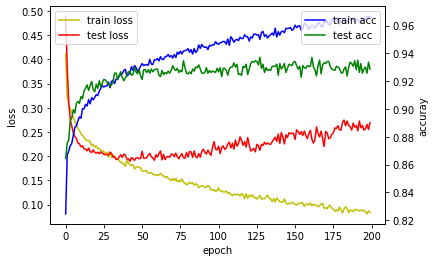

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

결론 : Adam lr은 0.001을 쓸 때 가장 좋았다.

# Dropout을 쓰면? (0.1, 0.2, 0.3) 

**Dropout 0.1**

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.1))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 3s 8ms/step - loss: 0.4178 - accuracy: 0.8256 - val_loss: 0.5371 - val_accuracy: 0.8634
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3108 - accuracy: 0.8702 - val_loss: 0.4004 - val_accuracy: 0.8615
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2934 - accuracy: 0.8746 - val_loss: 0.3017 - val_accuracy: 0.8798
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2805 - accuracy: 0.8801 - val_loss: 0.2641 - val_accuracy: 0.8857
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2662 - accuracy: 0.8866 - val_loss: 0.2443 - val_accuracy: 0.8931
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2565 - accuracy: 0.8904 - val_loss: 0.2259 - val_accuracy: 0.9090
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 0.2448 - accuracy: 0.8963 - val_loss: 0.2234 - val_accuracy: 0.9080

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.113403
accuracy        0.953752
val_loss        0.264559
val_accuracy    0.925861
dtype: float64

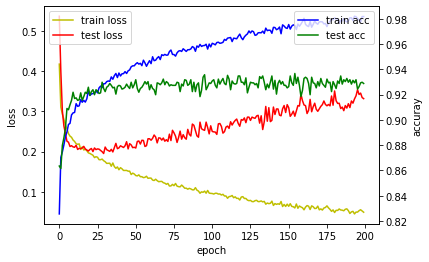

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**Dropout 0.2**

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_8 (Activation)    (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 6ms/step - loss: 0.5285 - accuracy: 0.7865 - val_loss: 0.5453 - val_accuracy: 0.7947
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3296 - accuracy: 0.8618 - val_loss: 0.3791 - val_accuracy: 0.8738
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3149 - accuracy: 0.8669 - val_loss: 0.3066 - val_accuracy: 0.8753
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2971 - accuracy: 0.8738 - val_loss: 0.2693 - val_accuracy: 0.8847
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2891 - accuracy: 0.8778 - val_loss: 0.2589 - val_accuracy: 0.8951
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.8812 - val_loss: 0.2489 - val_accuracy: 0.8996
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2751 - accuracy: 0.8862 - val_loss: 0.2389 - val_accuracy: 0.9010

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.145593
accuracy        0.940716
val_loss        0.223629
val_accuracy    0.926583
dtype: float64

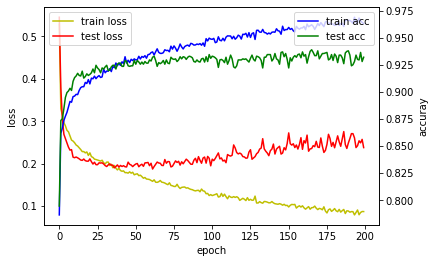

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**Dropout 0.3**

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
activation_14 (Activation)   (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 2s 7ms/step - loss: 0.4639 - accuracy: 0.7927 - val_loss: 0.4798 - val_accuracy: 0.8530
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3394 - accuracy: 0.8569 - val_loss: 0.3954 - val_accuracy: 0.8560
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3201 - accuracy: 0.8653 - val_loss: 0.3168 - val_accuracy: 0.8704
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3152 - accuracy: 0.8671 - val_loss: 0.2836 - val_accuracy: 0.8763
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3030 - accuracy: 0.8727 - val_loss: 0.2740 - val_accuracy: 0.8842
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2996 - accuracy: 0.8729 - val_loss: 0.2672 - val_accuracy: 0.8887
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2933 - accuracy: 0.8746 - val_loss: 0.2673 - val_accuracy: 0.8911

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.170644
accuracy        0.930885
val_loss        0.204006
val_accuracy    0.925616
dtype: float64

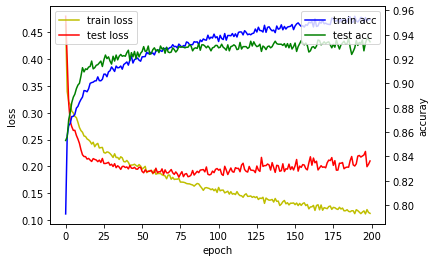

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**결론 : Dropout 0.2이 가장 좋음**

# BatchSize 32, 64, 128

**BatchSize 32**

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512       
_________________________________________________________________
activation_43 (Activation)   (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=32, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
253/253 [==============================] - 3s 5ms/step - loss: 0.4036 - accuracy: 0.8261 - val_loss: 0.4371 - val_accuracy: 0.7932
Epoch 2/200
253/253 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8628 - val_loss: 0.2938 - val_accuracy: 0.8748
Epoch 3/200
253/253 [==============================] - 1s 4ms/step - loss: 0.3111 - accuracy: 0.8713 - val_loss: 0.2811 - val_accuracy: 0.8773
Epoch 4/200
253/253 [==============================] - 1s 4ms/step - loss: 0.3080 - accuracy: 0.8722 - val_loss: 0.2697 - val_accuracy: 0.8793
Epoch 5/200
253/253 [==============================] - 1s 4ms/step - loss: 0.3013 - accuracy: 0.8743 - val_loss: 0.2649 - val_accuracy: 0.8817
Epoch 6/200
253/253 [==============================] - 1s 4ms/step - loss: 0.2883 - accuracy: 0.8743 - val_loss: 0.2582 - val_accuracy: 0.8842
Epoch 7/200
253/253 [==============================] - 1s 4ms/step - loss: 0.2810 - accuracy: 0.8779 - val_loss: 0.2502 - val_accuracy: 0.8897

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.133484
accuracy        0.945581
val_loss        0.239335
val_accuracy    0.921979
dtype: float64

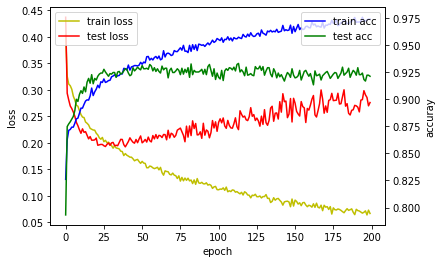

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**BatchSize 64**



In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
activation_60 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_41 (Batc (None, 128)               512       
_________________________________________________________________
activation_61 (Activation)   (None, 128)             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
127/127 [==============================] - 3s 7ms/step - loss: 0.4964 - accuracy: 0.7808 - val_loss: 0.5154 - val_accuracy: 0.8570
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3293 - accuracy: 0.8648 - val_loss: 0.3655 - val_accuracy: 0.8689
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.8733 - val_loss: 0.3027 - val_accuracy: 0.8763
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2933 - accuracy: 0.8774 - val_loss: 0.2713 - val_accuracy: 0.8832
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2797 - accuracy: 0.8809 - val_loss: 0.2594 - val_accuracy: 0.8862
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2787 - accuracy: 0.8820 - val_loss: 0.2541 - val_accuracy: 0.8906
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.2676 - accuracy: 0.8882 - val_loss: 0.2346 - val_accuracy: 0.9045

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.146202
accuracy        0.939913
val_loss        0.226449
val_accuracy    0.925156
dtype: float64

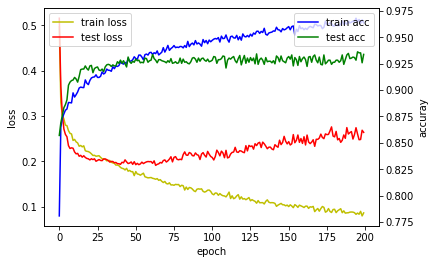

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

**BatchSize 128**

In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_detection.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8083, 16)
X_valid =  (2021, 16)
y_train =  (8083,)
y_valid =  (2021,)
(8083, 2) (2021, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               4352      
_________________________________________________________________
batch_normalization_36 (Batc (None, 256)               1024      
_________________________________________________________________
activation_54 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_37 (Batc (None, 128)               512       
_________________________________________________________________
activation_55 (Activation)   (None, 128)             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=128, validation_data=(X_valid,y_valid), shuffle=False)

Epoch 1/200
64/64 [==============================] - 2s 11ms/step - loss: 0.4786 - accuracy: 0.7951 - val_loss: 0.5841 - val_accuracy: 0.8412
Epoch 2/200
64/64 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.8649 - val_loss: 0.4969 - val_accuracy: 0.7689
Epoch 3/200
64/64 [==============================] - 0s 6ms/step - loss: 0.3070 - accuracy: 0.8703 - val_loss: 0.4811 - val_accuracy: 0.7437
Epoch 4/200
64/64 [==============================] - 0s 7ms/step - loss: 0.2998 - accuracy: 0.8744 - val_loss: 0.4286 - val_accuracy: 0.7838
Epoch 5/200
64/64 [==============================] - 0s 8ms/step - loss: 0.2936 - accuracy: 0.8765 - val_loss: 0.3800 - val_accuracy: 0.8333
Epoch 6/200
64/64 [==============================] - 0s 7ms/step - loss: 0.2824 - accuracy: 0.8827 - val_loss: 0.3250 - val_accuracy: 0.8669
Epoch 7/200
64/64 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.8823 - val_loss: 0.2782 - val_accuracy: 0.8837
Epoch 8/200


In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.154161
accuracy        0.937441
val_loss        0.214091
val_accuracy    0.923986
dtype: float64

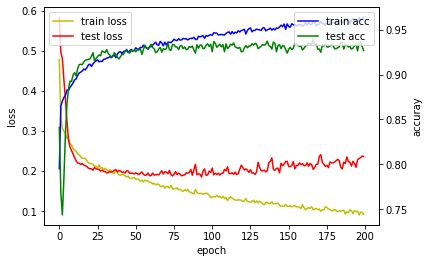

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

결론 : Batchsize 64 일때 가장 낫다.